In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [6]:
def generate_ma1(n, mu, theta, sigma=1, seed=42):
    """
    Generate MA(1) time series: y_t = mu + theta*e_{t-1} + e_t
    
    Parameters:
    -----------
    n : int
        Number of observations
    mu : float
        Unconditional mean
    theta : float
        MA(1) parameter
    sigma : float
        Standard deviation of white noise
    seed : int
        Random seed for reproducibility
    
    Returns:
    --------
    y : array
        Generated time series
    e : array
        White noise shocks
    """
    np.random.seed(seed)
    
    # Generate white noise e_t ~ N(0, sigma^2)
    e = np.random.normal(0, sigma, n+1)  # n+1 to have e_0 for first observation
    
    # Initialize y array
    y = np.zeros(n)
    
    # Generate y_t = mu + theta*e_{t-1} + e_t
    # Note: e[0] is e_0, e[1] is e_1, etc.
    for t in range(n):
        y[t] = mu + theta * e[t] + e[t+1]
    
    return y, e[1:]  # Return y and e (excluding e_0)

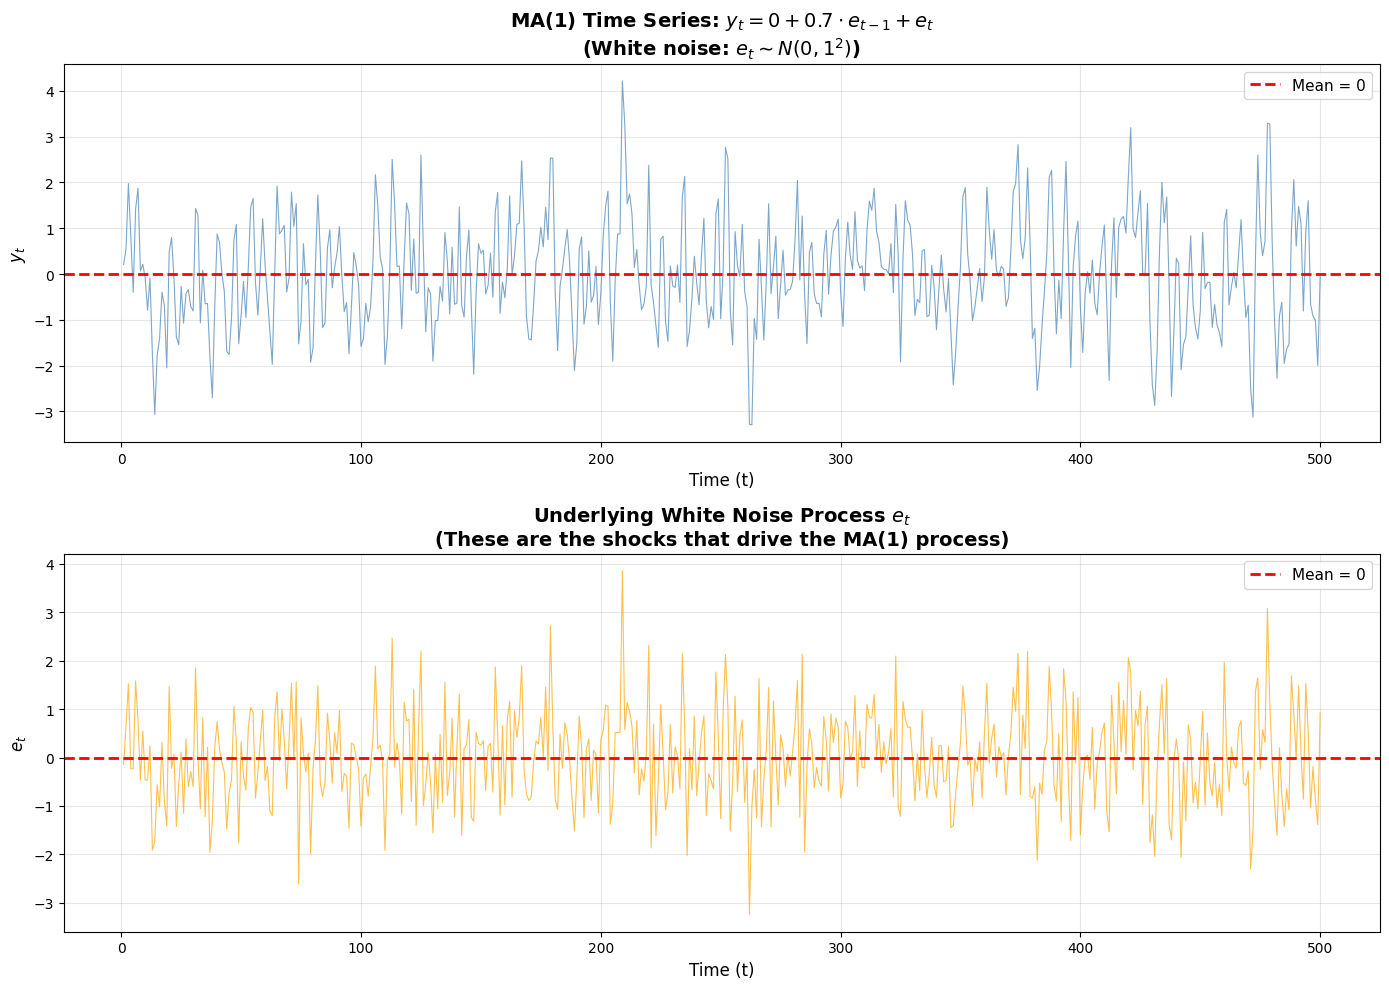


Summary Statistics:
  Mean of y_t: 0.0125 (theoretical: 0)
  Std of y_t: 1.1933 (theoretical: 1.2207)
  Mean of e_t: 0.0077 (theoretical: 0)
  Std of e_t: 0.9809 (theoretical: 1)


In [7]:
# Set parameters
mu = 0      # Mean
theta = 0.7  # MA(1) parameter
sigma = 1   # Standard deviation of white noise
n = 500     # Number of observations

# Generate the MA(1) series
y, e = generate_ma1(n, mu, theta, sigma, seed=42)

# Create time index
time = np.arange(1, n+1)

# Plot the time series
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Time series
axes[0].plot(time, y, linewidth=0.8, alpha=0.7, color='steelblue')
axes[0].axhline(y=mu, color='red', linestyle='--', linewidth=2, label=f'Mean = {mu}')
axes[0].set_title(f'MA(1) Time Series: $y_t = {mu} + {theta} \cdot e_{{t-1}} + e_t$\n(White noise: $e_t \sim N(0, {sigma}^2)$)', 
                fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time (t)', fontsize=12)
axes[0].set_ylabel('$y_t$', fontsize=12)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot 2: Underlying white noise
axes[1].plot(time, e, linewidth=0.8, alpha=0.7, color='orange')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2, label='Mean = 0')
axes[1].set_title('Underlying White Noise Process $e_t$\n(These are the shocks that drive the MA(1) process)', 
                fontsize=14, fontweight='bold')
axes[1].set_xlabel('Time (t)', fontsize=12)
axes[1].set_ylabel('$e_t$', fontsize=12)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nSummary Statistics:")
print(f"  Mean of y_t: {np.mean(y):.4f} (theoretical: {mu})")
print(f"  Std of y_t: {np.std(y):.4f} (theoretical: {sigma * np.sqrt(1 + theta**2):.4f})")
print(f"  Mean of e_t: {np.mean(e):.4f} (theoretical: 0)")
print(f"  Std of e_t: {np.std(e):.4f} (theoretical: {sigma})")

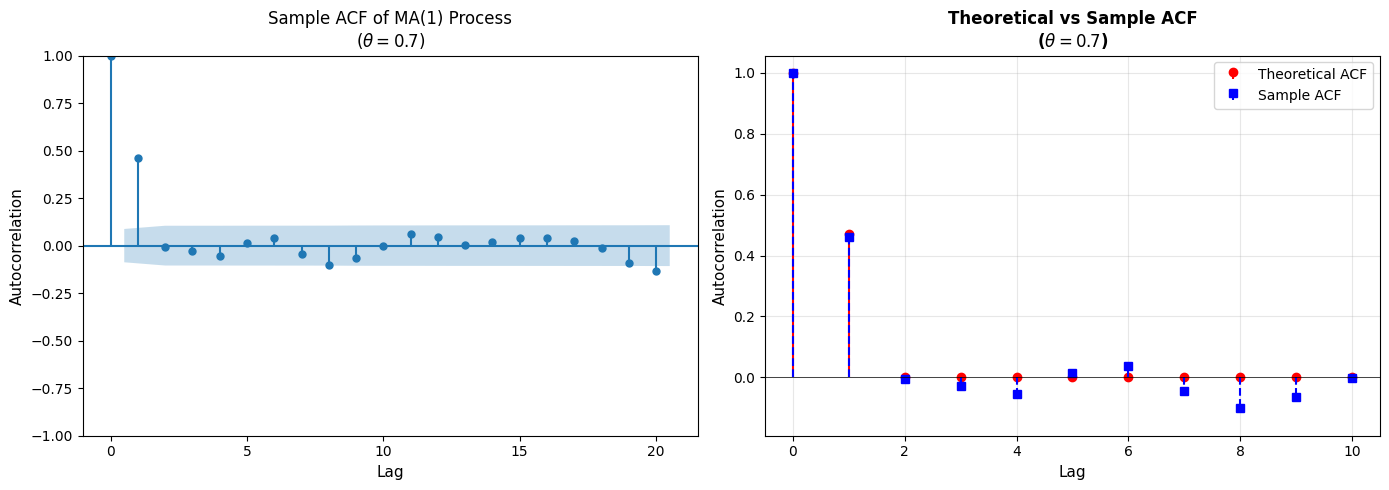


Theoretical ACF values:
  rho(0) = 1.0000
  rho(1) = 0.4698
  rho(k) = 0.0000 for k >= 2

Sample ACF values:
  rho(0) = 1.0000
  rho(1) = 0.4616
  rho(2) = -0.0058


In [8]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns

# Calculate theoretical ACF for MA(1)
def theoretical_acf_ma1(theta, max_lag=10):
    """
    Calculate theoretical ACF for MA(1) model
    rho(0) = 1
    rho(1) = theta / (1 + theta^2)
    rho(k) = 0 for k >= 2
    """
    acf_vals = np.zeros(max_lag + 1)
    acf_vals[0] = 1.0  # rho(0) = 1
    if max_lag >= 1:
        acf_vals[1] = theta / (1 + theta**2)  # rho(1)
    # rho(k) = 0 for k >= 2 (already zeros)
    return acf_vals

# Calculate sample ACF
sample_acf = acf(y, nlags=20, fft=False)
theoretical_acf = theoretical_acf_ma1(theta, max_lag=20)

# Plot ACF
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Sample ACF with confidence bands
plot_acf(y, lags=20, ax=axes[0], alpha=0.05, title=f'Sample ACF of MA(1) Process\n($\\theta = {theta}$)')
axes[0].set_xlabel('Lag', fontsize=11)
axes[0].set_ylabel('Autocorrelation', fontsize=11)

# Plot 2: Theoretical vs Sample ACF
lags = np.arange(21)
axes[1].stem(lags, theoretical_acf, linefmt='r-', markerfmt='ro', basefmt=' ', label='Theoretical ACF')
axes[1].stem(lags, sample_acf, linefmt='b--', markerfmt='bs', basefmt=' ', label='Sample ACF')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[1].set_xlabel('Lag', fontsize=11)
axes[1].set_ylabel('Autocorrelation', fontsize=11)
axes[1].set_title(f'Theoretical vs Sample ACF\n($\\theta = {theta}$)', fontsize=12, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(-0.5, 10.5)

plt.tight_layout()
plt.show()

print(f"\nTheoretical ACF values:")
print(f"  rho(0) = 1.0000")
print(f"  rho(1) = {theoretical_acf[1]:.4f}")
print(f"  rho(k) = 0.0000 for k >= 2")
print(f"\nSample ACF values:")
print(f"  rho(0) = {sample_acf[0]:.4f}")
print(f"  rho(1) = {sample_acf[1]:.4f}")
print(f"  rho(2) = {sample_acf[2]:.4f}")